In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/CSE499B/Myopia__V_Normal.zip' -d '/content/drive/MyDrive/CSE499B'

Archive:  /content/drive/MyDrive/CSE499B/Myopia__V_Normal.zip
   creating: /content/drive/MyDrive/CSE499B/Myopia__V_Normal/Normal/
  inflating: /content/drive/MyDrive/CSE499B/Myopia__V_Normal/Normal/Normal1_left.jpg  
  inflating: /content/drive/MyDrive/CSE499B/Myopia__V_Normal/Normal/Normal1034_left.jpg  
  inflating: /content/drive/MyDrive/CSE499B/Myopia__V_Normal/Normal/Normal1034_right.jpg  
  inflating: /content/drive/MyDrive/CSE499B/Myopia__V_Normal/Normal/Normal1054_left.jpg  
  inflating: /content/drive/MyDrive/CSE499B/Myopia__V_Normal/Normal/Normal1054_right.jpg  
  inflating: /content/drive/MyDrive/CSE499B/Myopia__V_Normal/Normal/Normal1060_left.jpg  
  inflating: /content/drive/MyDrive/CSE499B/Myopia__V_Normal/Normal/Normal1060_right.jpg  
  inflating: /content/drive/MyDrive/CSE499B/Myopia__V_Normal/Normal/Normal1072_left.jpg  
  inflating: /content/drive/MyDrive/CSE499B/Myopia__V_Normal/Normal/Normal1072_right.jpg  
  inflating: /content/drive/MyDrive/CSE499B/Myopia__V_Norm

In [ ]:
import os
len(os.listdir('/content/drive/MyDrive/CSE499B/Myopia__V_Normal/Pathological_Myopia')), \
len(os.listdir('/content/drive/MyDrive/CSE499B/Myopia__V_Normal/Normal'))

(1805, 2100)

In [ ]:
os.makedirs('/content/drive/MyDrive/CSE499B/Myopia__V_Normal/Dataset1')
!cp -r '/content/drive/MyDrive/CSE499B/Myopia__V_Normal/Pathological_Myopia' -d '/content/drive/MyDrive/CSE499B/Myopia__V_Normal/Dataset1'
!cp -r '/content/drive/MyDrive/CSE499B/Myopia__V_Normal/Normal' -d '/content/drive/MyDrive/CSE499B/Myopia__V_Normal/Dataset1'

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('/content/drive/MyDrive/CSE499B/Myopia__V_Normal/Dataset1', output="splitted_data", seed=1337, ratio=(.7, 0.2,0.1)) 

Copying files: 3905 files [00:19, 202.97 files/s]


In [ ]:
!zip -r '/content/splitted_data.zip' '/content/splitted_data'

!cp '/content/splitted_data.zip' -d '/content/drive/MyDrive/CSE499B/Myopia__V_Normal'

  adding: content/splitted_data/ (stored 0%)
  adding: content/splitted_data/val/ (stored 0%)
  adding: content/splitted_data/val/Normal/ (stored 0%)
  adding: content/splitted_data/val/Normal/Normal2345_left.jpg (deflated 1%)
  adding: content/splitted_data/val/Normal/Normal2709_left.jpg (deflated 1%)
  adding: content/splitted_data/val/Normal/Normal3136_left.jpg (deflated 1%)
  adding: content/splitted_data/val/Normal/Normal3188_left.jpg (deflated 1%)
  adding: content/splitted_data/val/Normal/Normal2644_right.jpg (deflated 1%)
  adding: content/splitted_data/val/Normal/Normal2769_left.jpg (deflated 1%)
  adding: content/splitted_data/val/Normal/Normal2429_left.jpg (deflated 1%)
  adding: content/splitted_data/val/Normal/Normal2866_right.jpg (deflated 1%)
  adding: content/splitted_data/val/Normal/Normal2557_right.jpg (deflated 1%)
  adding: content/splitted_data/val/Normal/Normal3041_left.jpg (deflated 1%)
  adding: content/splitted_data/val/Normal/Normal2431_right.jpg (deflated 1%)

In [ ]:
!cp '/content/drive/MyDrive/CSE499B/Myopia__V_Normal/splitted_data.zip' -d '/content/drive/MyDrive/CSE499B/Myopia__V_Normal'
!unzip '/content/splitted_data.zip'

cp: '/content/drive/MyDrive/CSE499B/Myopia__V_Normal/splitted_data.zip' and '/content/drive/MyDrive/CSE499B/Myopia__V_Normal/splitted_data.zip' are the same file
Archive:  /content/splitted_data.zip
   creating: content/splitted_data/
   creating: content/splitted_data/val/
   creating: content/splitted_data/val/Normal/
  inflating: content/splitted_data/val/Normal/Normal2345_left.jpg  
  inflating: content/splitted_data/val/Normal/Normal2709_left.jpg  
  inflating: content/splitted_data/val/Normal/Normal3136_left.jpg  
  inflating: content/splitted_data/val/Normal/Normal3188_left.jpg  
  inflating: content/splitted_data/val/Normal/Normal2644_right.jpg  
  inflating: content/splitted_data/val/Normal/Normal2769_left.jpg  
  inflating: content/splitted_data/val/Normal/Normal2429_left.jpg  
  inflating: content/splitted_data/val/Normal/Normal2866_right.jpg  
  inflating: content/splitted_data/val/Normal/Normal2557_right.jpg  
  inflating: content/splitted_data/val/Normal/Normal3041_left.j

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import tensorflow as tf
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import scikitplot
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

In [ ]:
data_aug_train = tf.keras.preprocessing.image.ImageDataGenerator(
    height_shift_range = 0.15,
    width_shift_range = 0.15,
    rotation_range = 10,
    shear_range = 0.1,
    fill_mode = 'nearest',
    zoom_range = 0.2)

train_generator = data_aug_train.flow_from_directory(
        '/content/content/splitted_data/train',
        target_size=(224, 224),
        batch_size = 32,
        class_mode ='categorical',
        color_mode = 'rgb',
        classes = ['Pathological_Myopia', 'Normal'],
        seed = 2,
        shuffle = True,
        interpolation = 'lanczos'
        )

data_aug_val = tf.keras.preprocessing.image.ImageDataGenerator()

val_generator = data_aug_val.flow_from_directory(
        '/content/content/splitted_data/val',
        target_size =(224, 224),
        batch_size =32,
        class_mode ='categorical',
        color_mode = 'rgb',
        classes= ['Pathological_Myopia', 'Normal'],
        seed = 2,
        shuffle = True,
        interpolation = 'lanczos'
        )

data_aug_test = tf.keras.preprocessing.image.ImageDataGenerator()

test_generator = data_aug_test.flow_from_directory(
        '/content/content/splitted_data/test',
        target_size = (224, 224),
        batch_size = 540,
        class_mode ='categorical',
        color_mode = 'rgb',
        classes = ['Pathological_Myopia', 'Normal'],
        shuffle = False,
        interpolation = 'lanczos'
)

Found 2733 images belonging to 2 classes.
Found 781 images belonging to 2 classes.
Found 391 images belonging to 2 classes.


In [ ]:
train_generator.class_indices, val_generator.class_indices

({'Pathological_Myopia': 0, 'Normal': 1},
 {'Pathological_Myopia': 0, 'Normal': 1})

In [ ]:
def MobileNetV2_Model():
  
  baseModel = tf.keras.applications.MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

  output = baseModel.output
  output = tf.keras.layers.GlobalAveragePooling2D()(output)
  output = tf.keras.layers.Dense(1024, activation="relu")(output)
  output = tf.keras.layers.Dropout(0.15)(output)
  output = tf.keras.layers.Dense(512, activation="relu")(output)
  output = tf.keras.layers.Dropout(0.15)(output)
  output = tf.keras.layers.Dense(2, activation="softmax")(output)
  model = tf.keras.Model(inputs=baseModel.input, outputs=output)
  for layer in baseModel.layers:
    layer.trainable = False
  return model

model = MobileNetV2_Model()

print("[INFO] compiling model...")
INIT_LR = 0.001
EPOCHS = 100
BATCHSIZE = 64 
optimizer = tf.keras.optimizers.Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()])

print(model.summary())

9406464/9406464 [==============================] - 0s 0us/step
[INFO] compiling model...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
     

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                                                  
 block_4_expand (Conv2D)        (None, 28, 28, 192)  6144        ['block_3_project_BN[0][0]']     
                                                                                                  
 block_4_expand_BN (BatchNormal  (None, 28, 28, 192)  768        ['block_4_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_4_expand_relu (ReLU)     (None, 28, 28, 192)  0           ['block_4_expand_BN[0][0]']      
                                                                                                  
 block_4_depthwise (DepthwiseCo  (None, 28, 28, 192)  1728       ['block_4_expand_relu[0][0]']    
 nv2D)                                                                                            
          

In [ ]:
modelPath = '/content/drive/MyDrive/CSE499B/saved_models/Pretrained MobileNetV2'
if not os.path.exists(modelPath):
  os.makedirs(modelPath)
  print('Model Directory Created')
else:
  print('Model Directory Already Exists')

reduceLROnPlat = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.8, patience=10, verbose=1, mode='max',
                                                      min_delta=0.0001, cooldown=5, min_lr=0.0001)
early = tf.keras.callbacks.EarlyStopping(monitor="val_categorical_accuracy", mode="max", patience=8)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(modelPath+'/MobileNetV2-best-model.h5', monitor='val_categorical_accuracy',
                                                      verbose=1, save_best_only=True, mode='max')

STEP_TRAIN = len(train_generator) 

modelHistory = model.fit(train_generator, steps_per_epoch=STEP_TRAIN, 
                         validation_data= val_generator, epochs=EPOCHS, verbose=1, callbacks=[model_checkpoint, reduceLROnPlat, early])

tf.keras.models.save_model(model, modelPath+'/MobileNetV2-model.h5', overwrite=True, include_optimizer=True, save_format=None,
                           signatures=None, options=None)

Model Directory Already Exists
Epoch 1/100
86/86 [==============================] - ETA: 0s - loss: 0.5103 - categorical_accuracy: 0.8130 - auc: 0.8706
Epoch 1: val_categorical_accuracy improved from -inf to 0.72471, saving model to /content/drive/MyDrive/CSE499B/saved_models/Pretrained MobileNetV2/MobileNetV2-best-model.h5
86/86 [==============================] - 191s 2s/step - loss: 0.5103 - categorical_accuracy: 0.8130 - auc: 0.8706 - val_loss: 0.5589 - val_categorical_accuracy: 0.7247 - val_auc: 0.8405 - lr: 0.0010
Epoch 2/100
86/86 [==============================] - ETA: 0s - loss: 0.3576 - categorical_accuracy: 0.8482 - auc: 0.9206
Epoch 2: val_categorical_accuracy did not improve from 0.72471
86/86 [==============================] - 187s 2s/step - loss: 0.3576 - categorical_accuracy: 0.8482 - auc: 0.9206 - val_loss: 0.6121 - val_categorical_accuracy: 0.7145 - val_auc: 0.8508 - lr: 0.0010
Epoch 3/100
86/86 [==============================] - ETA: 0s - loss: 0.3086 - categorical_ac

In [ ]:
import pickle
with open('/content/drive/MyDrive/CSE499B/saved_models/Pretrained MobileNetV2/MobileNetV2_trainHistoryDict', 'wb') as file_pi:
  pickle.dump(modelHistory.history, file_pi)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history['categorical_accuracy']
    val_acc = history['val_categorical_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    auc = history['auc']
    val_auc = history['val_auc']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(18, 5))
    plt.subplot(1, 3, 1)
    plt.plot(x, acc, 'b', label='Training acc',marker = 'p',color='green')
    plt.plot(x,val_acc, 'r', label='Validation acc',marker = 'p',color='red')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right' )
    plt.subplot(1, 3, 2)
    plt.plot(x, loss, label='Training loss',marker = 'p',color='green')
    plt.plot(x, val_loss, label='Validation loss',marker = 'p',color='red')
    plt.title('Training and Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    # plt.savefig('curve.jpg',dpi=600)
    plt.subplot(1, 3, 3)
    plt.plot(x, auc, 'b', label='Training loss',marker = 'p',color='green')
    plt.plot(x, val_auc, 'r', label='Validation loss',marker = 'p',color='red')
    plt.title('Training and Validation AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend()
    plt.savefig('curve.jpg',dpi=600)

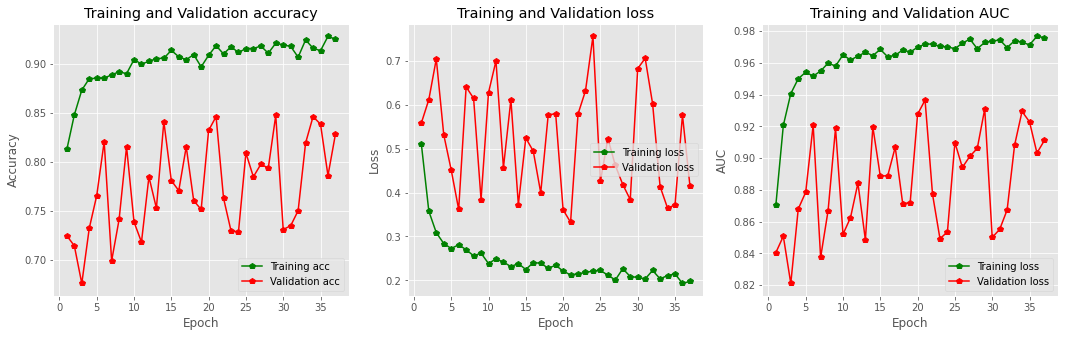

In [ ]:
import pickle
with open('/content/drive/MyDrive/CSE499B/saved_models/Pretrained MobileNetV2/MobileNetV2_trainHistoryDict', 'rb') as file_pi:
  dct=pickle.load(file_pi)

plot_history(dct)

In [ ]:
!cp -r '/content/drive/MyDrive/CSE499B/saved_models' -d '/content/drive/MyDrive/CSE499B/Myopia__V_Normal'

In [ ]:
!cp -r "/content/drive/MyDrive/CSE499B/saved_models" -d '/content'  

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/CSE499B/saved_models/Pretrained MobileNetV2/MobileNetV2-best-model.h5')
loss, accuracy, auc= model.evaluate(test_generator,  verbose=1)
print('Model Accuracy: {:0.2f} | Model Loss: {:0.4f} | Model AUC: {:.02f}'.format(accuracy, loss, auc))

1/1 [==============================] - 32s 32s/step - loss: 0.2899 - categorical_accuracy: 0.8900 - auc: 0.9529
Model Accuracy: 0.89 | Model Loss: 0.2899 | Model AUC: 0.95


In [ ]:
batch=0
label = []
for x,y in test_generator:
  # cc.append(y)
  if batch==1:
    break
  label.append(y)
  batch+=1
y_true = np.array([np.where(label[0][i] == 1)[0][0] for i in range(len(test_generator.filenames))])
y_true.shape

(391,)

In [ ]:
Y_pred = model.predict_generator(test_generator, 1)
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
classes= ['Myopia', 'Normal']
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=classes))

Classification Report
              precision    recall  f1-score   support

      Myopia       0.99      0.77      0.87       181
      Normal       0.84      0.99      0.91       210

    accuracy                           0.89       391
   macro avg       0.91      0.88      0.89       391
weighted avg       0.91      0.89      0.89       391



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):

    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    if sum_stats:
        accuracy  = np.trace(cf) / float(np.sum(cf))
        if len(cf)==2:
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    if figsize==None:
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        categories=False

    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,annot_kws={'size':16},xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
        plt.savefig('conf_mat.jpeg',dpi=600)
    else:
        plt.xlabel(stats_text)
        plt.savefig('conf_mat.jpeg',dpi=600)
    
    if title:
        plt.title(title)
        plt.savefig('conf_mat.jpeg',dpi=600)

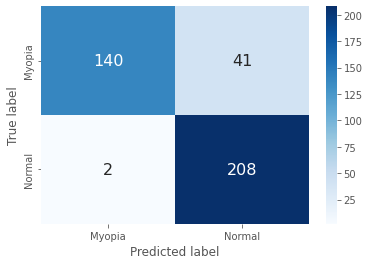

In [ ]:
conf_mat=confusion_matrix(y_true, y_pred)
make_confusion_matrix(conf_mat, figsize=(6,4),percent=False,sum_stats=False,categories=['Myopia', 'Normal'],cbar=True,cmap='Blues')

In [ ]:
#!/bin/bash 
dir_root = "/content/drive/MyDrive/CSE499B/Myopia__V_Normal"
!cp -r "$dir_root"'saved_models' -d '/content'

cp: cannot stat '/content/drive/MyDrive/CSE499B/Myopia__V_Normalsaved_models': No such file or directory


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files
import pathlib 

In [ ]:
def predict_class(img_path, model_path):
    classes= {'Noraml': 1, 'Pathological_Myopia': 0}
    img = tf.keras.preprocessing.image.load_img(img_path, grayscale=False, 
                                               color_mode="rgb", target_size=(224, 224), 
                                               interpolation="lanczos")
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = np.array([img])  # Convert single image to a batch.
    model = tf.keras.models.load_model(model_path)
    Y_pred = model.predict(img)
    y_pred = np.argmax(Y_pred, axis=1)
    label = [k for k, v in classes.items() if v == y_pred[0]][0]
    plt.imshow(cv2.imread(img_path))
    plt.title('Predicted Class Label: {}'.format(label))
    plt.show()

model_path = '/content/drive/MyDrive/CSE499B/Myopia__V_Normal/saved_models/Pretrained MobileNetV2/MobileNetV2-best-model.h5'

Saving 390_right.jpg to 390_right.jpg


1/1 [==============================] - 1s 1s/step


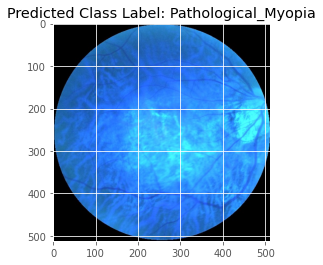

In [ ]:
file = files.upload()
file = list(file.keys())[0]
predict_class(file, model_path)

Saving Normal1_left.jpg to Normal1_left.jpg
1/1 [==============================] - 1s 1s/step


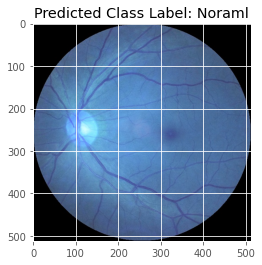

In [ ]:
file = files.upload()
file = list(file.keys())[0]
predict_class(file, model_path)

Saving Normal3375_right.jpg to Normal3375_right.jpg
1/1 [==============================] - 1s 968ms/step


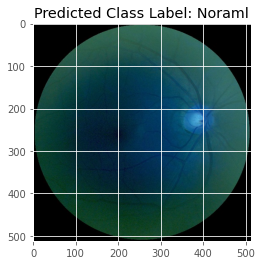

In [ ]:
file = files.upload()
file = list(file.keys())[0]
predict_class(file, model_path)

Saving Pathological_Myopia_original_1674_left.jpg_439ae872-6502-4882-a356-fc97bc179f36.jpg to Pathological_Myopia_original_1674_left.jpg_439ae872-6502-4882-a356-fc97bc179f36.jpg
1/1 [==============================] - 1s 1s/step


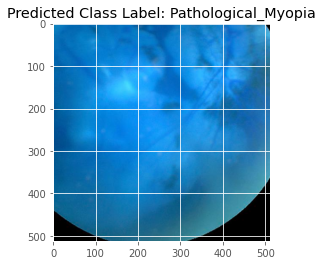

In [ ]:
file = files.upload()
file = list(file.keys())[0]
predict_class(file, model_path)